In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('tested.csv')

In [193]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [194]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [196]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [197]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Question : What is the age distribution of passengers?

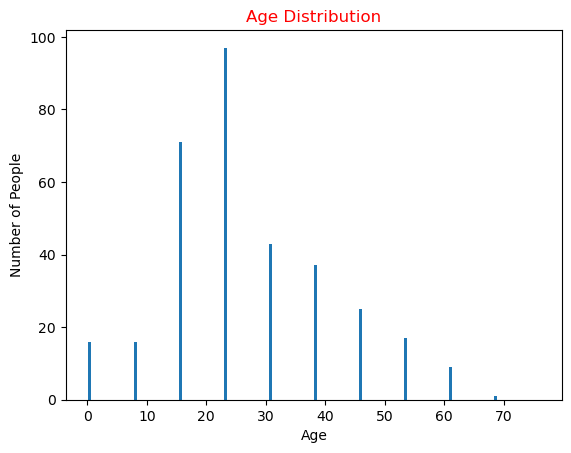

In [198]:
plt.hist(df['Age'],width=0.5)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution',color='red')
plt.show()

Observation: Most of the people were Aged between 15-25

In [199]:
df['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [200]:
df['Cabin'].fillna('Unknown', inplace=True)

In [201]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [202]:
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [203]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [204]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [205]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Question : Is there a correlation between passenger class and survival rate?

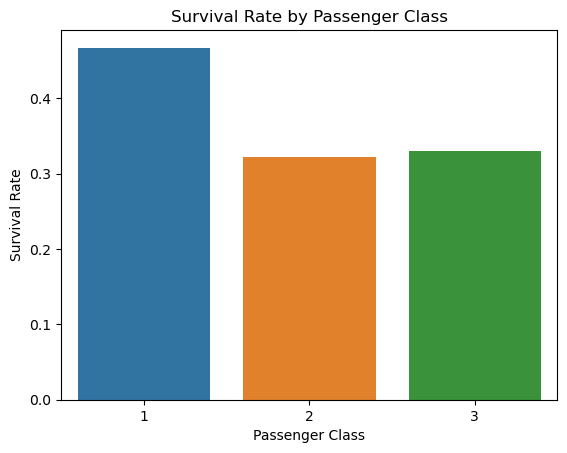

In [206]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

Observation : The Survival rate of Passengers of 1st class was high as compared to 2nd and 3rd

Question : Does the port of embarkation (Embarked) affect the survival rate?

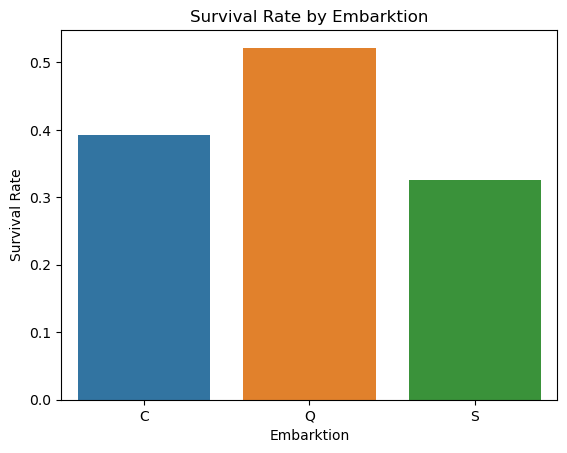

In [207]:
survival_rate_by_embark = df.groupby('Embarked')['Survived'].mean()

sns.barplot(x=survival_rate_by_embark.index, y=survival_rate_by_embark.values)
plt.xlabel('Embarktion')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarktion')
plt.show()

Observation : The Number of Passengers Embarking from 'Q' were survived more as compared to 'C' and 'S'.  

Question : What is the correlation of Fare and Survival.

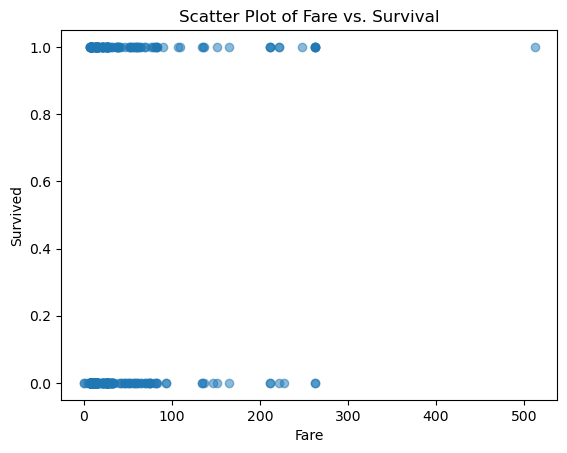

In [208]:
plt.scatter(df['Fare'], df['Survived'], alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Scatter Plot of Fare vs. Survival')
plt.show()

Observation : Most passenger payed less than 100 and rate of survival was almost equal.